# Importing Dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df = pd.read_csv("/content/drive/MyDrive/IoT Home Analysis/HomeC.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


time  use [kW]  gen [kW]  House overall [kW]  Dishwasher [kW]  \
0       1451624400  0.932833  0.003483            0.932833         0.000033   
1       1451624401  0.934333  0.003467            0.934333         0.000000   
2       1451624402  0.931817  0.003467            0.931817         0.000017   
3       1451624403  1.022050  0.003483            1.022050         0.000017   
4       1451624404  1.139400  0.003467            1.139400         0.000133   
...            ...       ...       ...                 ...              ...   
503906  1452128306  1.599333  0.003233            1.599333         0.000050   
503907  1452128307  1.924267  0.003217            1.924267         0.000033   
503908  1452128308  1.978200  0.003217            1.978200         0.000050   
503909  1452128309  1.990950  0.003233            1.990950         0.000050   
503910           \       NaN       NaN                 NaN              NaN   

        Furnace 1 [kW]  Furnace 2 [kW]  Home office [kW]  Fridge [kW]  \
0             0.020700        0.061917          0.442633     0.124150   
1             0.020717        0.063817          0.444067     0.124000   
2             0.020700        0.062317          0.446067     0.123533   
3             0.106900        0.068517          0.446583     0.123133   
4             0.236933        0.063983          0.446533     0.122850   
...                ...             ...               ...          ...   
503906        0.104017        0.625033          0.041750     0.005233   
503907        0.422383        0.637733          0.042033     0.004983   
503908        0.495667        0.620367          0.042100     0.005333   
503909        0.494700        0.634133          0.042100     0.004917   
503910             NaN             NaN               NaN          NaN   

        Wine cellar [kW]  ...  visibility     summary  apparentTemperature  \
0               0.006983  ...       10.00       Clear                29.26   
1               0.006983  ...       10.00       Clear                29.26   
2               0.006983  ...       10.00       Clear                29.26   
3               0.006983  ...       10.00       Clear                29.26   
4               0.006850  ...       10.00       Clear                29.26   
...                  ...  ...         ...         ...                  ...   
503906          0.008433  ...        8.74  Light Rain                29.45   
503907          0.008467  ...        8.74  Light Rain                29.45   
503908          0.008233  ...        8.74  Light Rain                29.45   
503909          0.008133  ...        8.74  Light Rain                29.45   
503910               NaN  ...         NaN         NaN                  NaN   

        pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
0        1016.91       9.18  cloudCover        282.0           0.0000   
1        1016.91       9.18  cloudCover        282.0           0.0000   
2        1016.91       9.18  cloudCover        282.0           0.0000   
3        1016.91       9.18  cloudCover        282.0           0.0000   
4        1016.91       9.18  cloudCover        282.0           0.0000   
...          ...        ...         ...          ...              ...   
503906   1011.49       6.72        0.31        186.0           0.0101   
503907   1011.49       6.72        0.31        186.0           0.0101   
503908   1011.49       6.72        0.31        186.0           0.0101   
503909   1011.49       6.72        0.31        186.0           0.0101   
503910       NaN        NaN         NaN          NaN              NaN   

        dewPoint  precipProbability  
0          24.40               0.00  
1          24.40               0.00  
2          24.40               0.00  
3          24.40               0.00  
4          24.40               0.00  
...          ...                ...  
503906     31.27               0.51  
503907     31.27               0.51  
503908     31.27               0

In [3]:
df.columns = [i.replace(' [kW]', '') for i in df.columns]

Time attribute is given in unix timestamp 1451624400 - 1452128309

---



# Data Preprocessing

In [4]:
df.shape

(503911, 32)

Checking for NA values and Invalid rows

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   time                 503911 non-null  object 
 1   use                  503910 non-null  float64
 2   gen                  503910 non-null  float64
 3   House overall        503910 non-null  float64
 4   Dishwasher           503910 non-null  float64
 5   Furnace 1            503910 non-null  float64
 6   Furnace 2            503910 non-null  float64
 7   Home office          503910 non-null  float64
 8   Fridge               503910 non-null  float64
 9   Wine cellar          503910 non-null  float64
 10  Garage door          503910 non-null  float64
 11  Kitchen 12           503910 non-null  float64
 12  Kitchen 14           503910 non-null  float64
 13  Kitchen 38           503910 non-null  float64
 14  Barn                 503910 non-null  float64
 15  Well             

In [6]:
print(df["time"].unique())
print(df["icon"].unique())
print(df["summary"].unique())
print(df["cloudCover"].unique())

[1451624400 1451624401 1451624402 ... '1452128308' '1452128309' '\\']
['clear-night' 'partly-cloudy-night' 'clear-day' 'cloudy'
 'partly-cloudy-day' 'rain' 'snow' 'wind' 'fog' nan]
['Clear' 'Mostly Cloudy' 'Overcast' 'Partly Cloudy' 'Drizzle' 'Light Rain'
 'Rain' 'Light Snow' 'Flurries' 'Breezy' 'Snow' 'Rain and Breezy' 'Foggy'
 'Breezy and Mostly Cloudy' 'Breezy and Partly Cloudy'
 'Flurries and Breezy' 'Dry' 'Heavy Snow' nan]
['cloudCover' '0.75' '0' '1' '0.31' '0.44' '0.13' '0.19' '0.25' '0.16'
 '0.21' '0.15' '0.14' '0.27' '0.28' '0.17' '0.05' '0.1' '0.26' '0.29'
 '0.11' '0.09' '0.12' '0.06' '0.02' '0.08' '0.04' '0.35' '0.22' '0.23'
 '0.54' '0.39' '0.03' '0.07' '0.76' '0.62' '0.18' '0.79' '0.48' '0.24'
 '0.57' 0.24 1.0 0.31 0.28 0.15 0.41 0.1 0.12 0.08 0.09 0.19 0.04 0.05
 0.29 0.27 0.35 0.18 0.06 0.03 0.11 0.14 0.25 0.78 0.0 0.16 0.21 0.23 0.17
 0.75 0.26 0.2 0.76 0.13 0.77 0.46 0.07 0.55 0.02 0.01 0.51 0.47 0.5 0.4
 0.3 0.22 0.43 0.33 0.6 0.68 0.66 0.45 0.34 0.52 0.67 0.48 0.49 0.

Found 1 row to be missing <br>
Found 4 object type which 3 is valid and 1 is invalid having Float & String values


---



Removing NA values

In [7]:
df = df[0:503910]
df

time       use       gen  House overall  Dishwasher  Furnace 1  \
0       1451624400  0.932833  0.003483       0.932833    0.000033   0.020700   
1       1451624401  0.934333  0.003467       0.934333    0.000000   0.020717   
2       1451624402  0.931817  0.003467       0.931817    0.000017   0.020700   
3       1451624403  1.022050  0.003483       1.022050    0.000017   0.106900   
4       1451624404  1.139400  0.003467       1.139400    0.000133   0.236933   
...            ...       ...       ...            ...         ...        ...   
503905  1452128305  1.601233  0.003183       1.601233    0.000050   0.085267   
503906  1452128306  1.599333  0.003233       1.599333    0.000050   0.104017   
503907  1452128307  1.924267  0.003217       1.924267    0.000033   0.422383   
503908  1452128308  1.978200  0.003217       1.978200    0.000050   0.495667   
503909  1452128309  1.990950  0.003233       1.990950    0.000050   0.494700   

        Furnace 2  Home office    Fridge  Wine cellar  ...  visibility  \
0        0.061917     0.442633  0.124150     0.006983  ...       10.00   
1        0.063817     0.444067  0.124000     0.006983  ...       10.00   
2        0.062317     0.446067  0.123533     0.006983  ...       10.00   
3        0.068517     0.446583  0.123133     0.006983  ...       10.00   
4        0.063983     0.446533  0.122850     0.006850  ...       10.00   
...           ...          ...       ...          ...  ...         ...   
503905   0.642417     0.041783  0.005267     0.008667  ...        8.74   
503906   0.625033     0.041750  0.005233     0.008433  ...        8.74   
503907   0.637733     0.042033  0.004983     0.008467  ...        8.74   
503908   0.620367     0.042100  0.005333     0.008233  ...        8.74   
503909   0.634133     0.042100  0.004917     0.008133  ...        8.74   

           summary  apparentTemperature  pressure  windSpeed  cloudCover  \
0            Clear                29.26   1016.91       9.18  cloudCover   
1            Clear                29.26   1016.91       9.18  cloudCover   
2            Clear                29.26   1016.91       9.18  cloudCover   
3            Clear                29.26   1016.91       9.18  cloudCover   
4            Clear                29.26   1016.91       9.18  cloudCover   
...            ...                  ...       ...        ...         ...   
503905  Light Rain                29.45   1011.49       6.72        0.31   
503906  Light Rain                29.45   1011.49       6.72        0.31   
503907  Light Rain                29.45   1011.49       6.72        0.31   
503908  Light Rain                29.45   1011.49       6.72        0.31   
503909  Light Rain                29.45   1011.49       6.72        0.31   

        windBearing  precipIntensity  dewPoint  precipProbability  
0             282.0           0.0000     24.40               0.00  
1             282.0           0.0000     24.40               0.00  
2             282.0           0.0000     24.40               0.00  
3             282.0           0.0000     24.40               0.00  
4             282.0           0.0000     24.40               0.00  
...             ...              ...       ...                ...  
503905        186.0           0.0101     31.27               0.51  
503906        186.0           0.0101     31.27               0.51  
503907        186.0           0.0101     31.27               0.51  
503908        186.0           0.0101     31.27               0.51  
503909        186.0           0.0101     31.27               0.51  

[503910 rows x 32 columns]

In [8]:
df.isnull().sum()

time                   0
use                    0
gen                    0
House overall          0
Dishwasher             0
Furnace 1              0
Furnace 2              0
Home office            0
Fridge                 0
Wine cellar            0
Garage door            0
Kitchen 12             0
Kitchen 14             0
Kitchen 38             0
Barn                   0
Well                   0
Microwave              0
Living room            0
Solar                  0
temperature            0
icon                   0
humidity               0
visibility             0
summary                0
apparentTemperature    0
pressure               0
windSpeed              0
cloudCover             0
windBearing            0
precipIntensity        0
dewPoint               0
precipProbability      0
dtype: int64

Replacing the invalid row values with valid values




In [9]:
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True)
df['cloudCover'] = df['cloudCover'].astype('float')
print(df["cloudCover"].unique())

[0.75 0.   1.   0.31 0.44 0.13 0.19 0.25 0.16 0.21 0.15 0.14 0.27 0.28
 0.17 0.05 0.1  0.26 0.29 0.11 0.09 0.12 0.06 0.02 0.08 0.04 0.35 0.22
 0.23 0.54 0.39 0.03 0.07 0.76 0.62 0.18 0.79 0.48 0.24 0.57 0.41 0.78
 0.2  0.77 0.46 0.55 0.01 0.51 0.47 0.5  0.4  0.3  0.43 0.33 0.6  0.68
 0.66 0.45 0.34 0.52 0.67 0.49 0.37 0.36 0.61 0.38 0.42 0.53 0.63 0.32
 0.56 0.58 0.72 0.73 0.71 0.64 0.59]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Converting unix timestamp to "yyyy-mm-dd hh:mm:ss"

In [10]:
df['time'] = pd.to_datetime(df['time'], unit = 's')
df['time'] = pd.DatetimeIndex(pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min'))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


time       use       gen  House overall  Dishwasher  \
0 2016-01-01 05:00:00  0.932833  0.003483       0.932833    0.000033   
1 2016-01-01 05:01:00  0.934333  0.003467       0.934333    0.000000   
2 2016-01-01 05:02:00  0.931817  0.003467       0.931817    0.000017   
3 2016-01-01 05:03:00  1.022050  0.003483       1.022050    0.000017   
4 2016-01-01 05:04:00  1.139400  0.003467       1.139400    0.000133   

   Furnace 1  Furnace 2  Home office    Fridge  Wine cellar  ...  visibility  \
0   0.020700   0.061917     0.442633  0.124150     0.006983  ...        10.0   
1   0.020717   0.063817     0.444067  0.124000     0.006983  ...        10.0   
2   0.020700   0.062317     0.446067  0.123533     0.006983  ...        10.0   
3   0.106900   0.068517     0.446583  0.123133     0.006983  ...        10.0   
4   0.236933   0.063983     0.446533  0.122850     0.006850  ...        10.0   

   summary  apparentTemperature  pressure  windSpeed  cloudCover  windBearing  \
0    Clear                29.26   1016.91       9.18        0.75        282.0   
1    Clear                29.26   1016.91       9.18        0.75        282.0   
2    Clear                29.26   1016.91       9.18        0.75        282.0   
3    Clear                29.26   1016.91       9.18        0.75        282.0   
4    Clear                29.26   1016.91       9.18        0.75        282.0   

   precipIntensity  dewPoint  precipProbability  
0              0.0      24.4                0.0  
1              0.0      24.4                0.0  
2              0.0      24.4                0.0  
3              0.0      24.4                0.0  
4              0.0      24.4                0.0  

[5 rows x 32 columns]

Correlation Plot

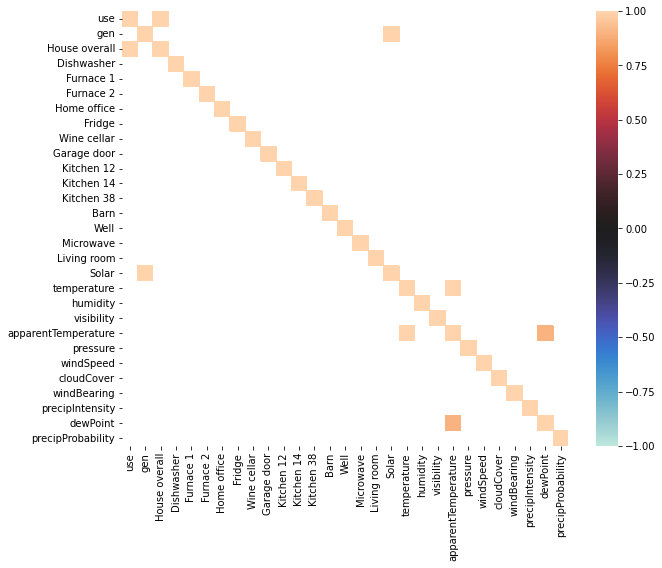

In [11]:
fig = plt.subplots(figsize=(10, 8)) 
corr = df.corr()
sns.heatmap(corr[corr>0.9], vmax=1, vmin=-1, center=0)
plt.show()

Here the attribute gen & solar and house overall & use are highly corelated.it is better to remove it


Removing duplicate columns

In [12]:
col_corr = set() # Set of all the names of deleted columns
def correlation(dataset, threshold):
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
      for j in range(i):
          if (abs(corr_matrix.iloc[i, j]) >= threshold) and (corr_matrix.columns[j] not in col_corr):
              colname = corr_matrix.columns[i] # getting the name of column
              col_corr.add(colname)
correlation(df, 0.9)
col_corr

{'House overall', 'Solar', 'apparentTemperature'}

In [13]:
df.drop(col_corr, axis = 1, inplace = True)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


time       use       gen  Dishwasher  Furnace 1  Furnace 2  \
0 2016-01-01 05:00:00  0.932833  0.003483    0.000033   0.020700   0.061917   
1 2016-01-01 05:01:00  0.934333  0.003467    0.000000   0.020717   0.063817   
2 2016-01-01 05:02:00  0.931817  0.003467    0.000017   0.020700   0.062317   
3 2016-01-01 05:03:00  1.022050  0.003483    0.000017   0.106900   0.068517   
4 2016-01-01 05:04:00  1.139400  0.003467    0.000133   0.236933   0.063983   

   Home office    Fridge  Wine cellar  Garage door  ...  humidity  visibility  \
0     0.442633  0.124150     0.006983     0.013083  ...      0.62        10.0   
1     0.444067  0.124000     0.006983     0.013117  ...      0.62        10.0   
2     0.446067  0.123533     0.006983     0.013083  ...      0.62        10.0   
3     0.446583  0.123133     0.006983     0.013000  ...      0.62        10.0   
4     0.446533  0.122850     0.006850     0.012783  ...      0.62        10.0   

   summary  pressure  windSpeed  cloudCover  windBearing  precipIntensity  \
0    Clear   1016.91       9.18        0.75        282.0              0.0   
1    Clear   1016.91       9.18        0.75        282.0              0.0   
2    Clear   1016.91       9.18        0.75        282.0              0.0   
3    Clear   1016.91       9.18        0.75        282.0              0.0   
4    Clear   1016.91       9.18        0.75        282.0              0.0   

  dewPoint  precipProbability  
0     24.4                0.0  
1     24.4                0.0  
2     24.4                0.0  
3     24.4                0.0  
4     24.4                0.0  

[5 rows x 29 columns]

# EDA

Density plots for Total usage of energy and Generation of energy

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


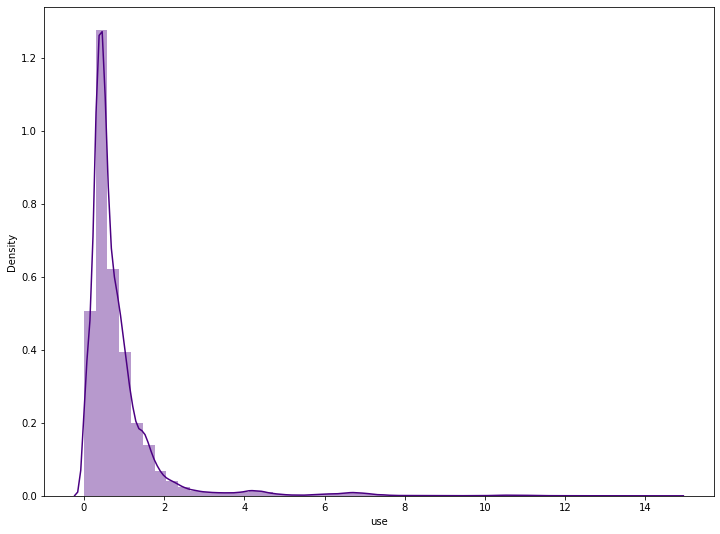

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


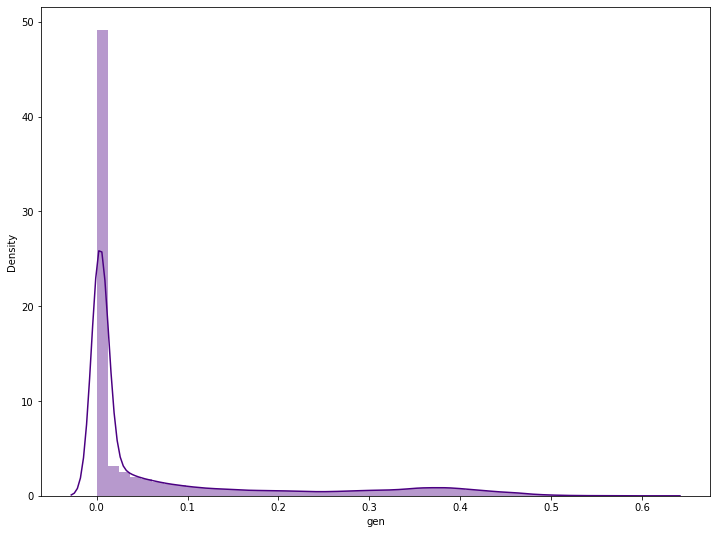

In [14]:
plt.figure(figsize = (12,9))
sns.distplot(df['use'], color = 'indigo')
plt.show()

plt.figure(figsize = (12,9))
sns.distplot(df['gen'], color = 'indigo')
plt.show()

Stacked density plot for appliances using energy

(-0.1, 2.0)

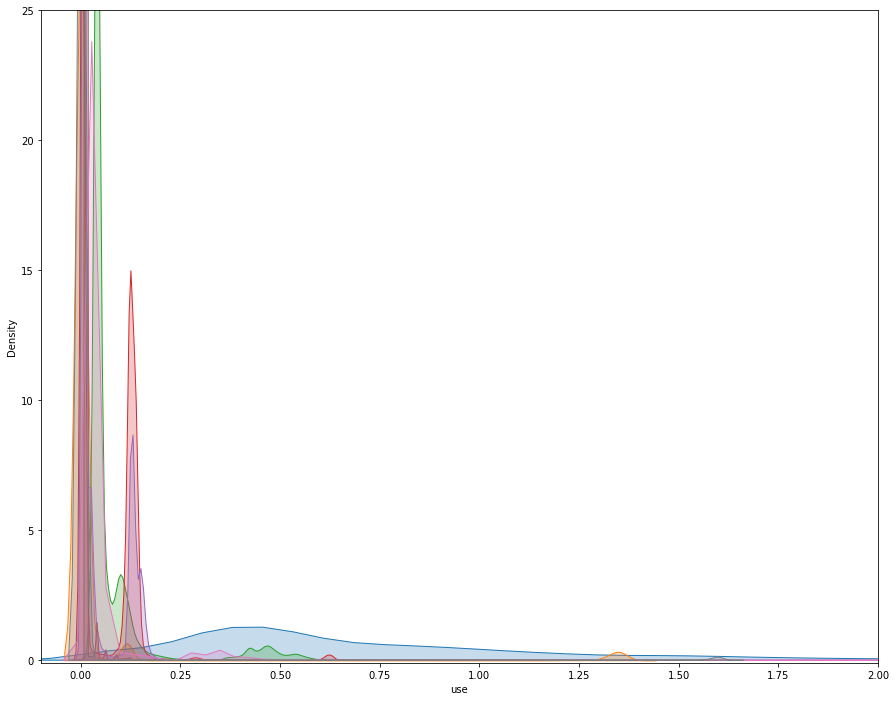

In [15]:
plt.figure(figsize = (15,12))
p1=sns.kdeplot(df["use"], shade=True)
p1=sns.kdeplot(df["Dishwasher"], shade=True)
p1=sns.kdeplot(df["Home office"], shade=True)
p1=sns.kdeplot(df["Fridge"], shade=True)
p1=sns.kdeplot(df["Wine cellar"], shade=True)
p1=sns.kdeplot(df["Garage door"], shade=True)
p1=sns.kdeplot(df["Barn"], shade=True)
p1=sns.kdeplot(df["Well"], shade=True)
plt.ylim(-0.1, 25)
plt.xlim(-0.1, 2)

Densisty plot for weather based attributes

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


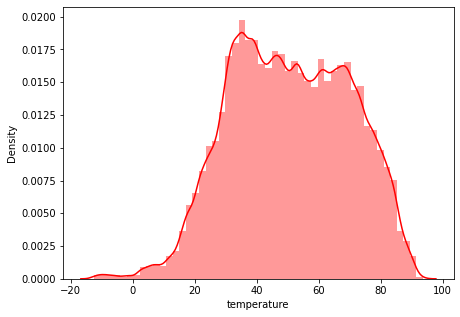

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


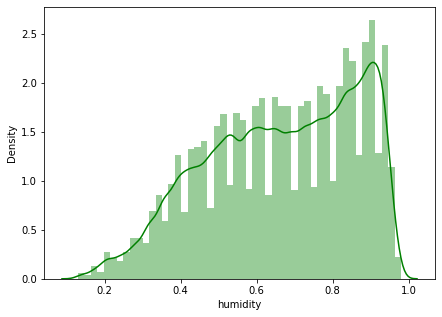

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


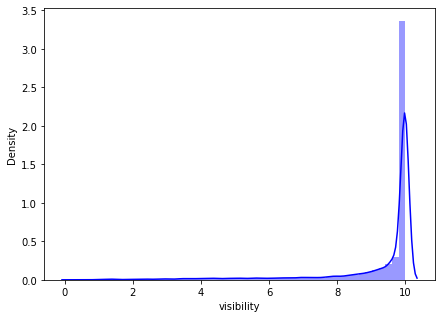

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


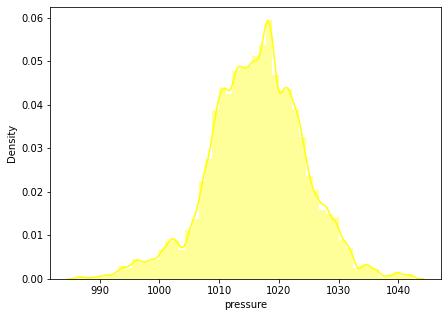

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


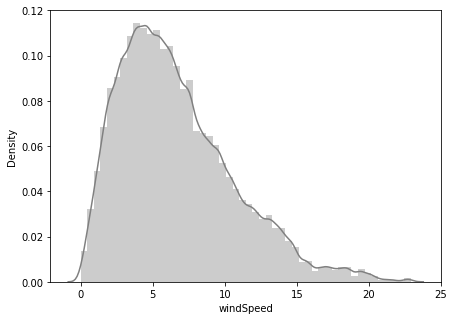

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


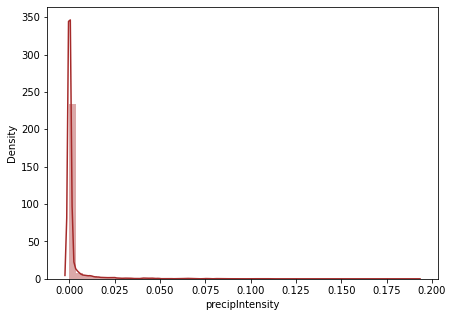

In [16]:
plt.figure(figsize = (7,5))
sns.distplot(df['temperature'], color = 'red', kde=True)
plt.show()

plt.figure(figsize = (7,5))
sns.distplot(df['humidity'], color = 'green', kde=True)
plt.show()

plt.figure(figsize = (7,5))
sns.distplot(df['visibility'], color = 'blue', kde=True)
plt.show()

plt.figure(figsize = (7,5))
sns.distplot(df['pressure'], color = 'yellow', kde=True)
plt.show()

plt.figure(figsize = (7,5))
sns.distplot(df['windSpeed'], color = 'gray', kde=True)
plt.show()

plt.figure(figsize = (7,5))
sns.distplot(df['precipIntensity'], color = 'brown', kde=True)
plt.show()

Plot of Energy Usage Over 10 Days

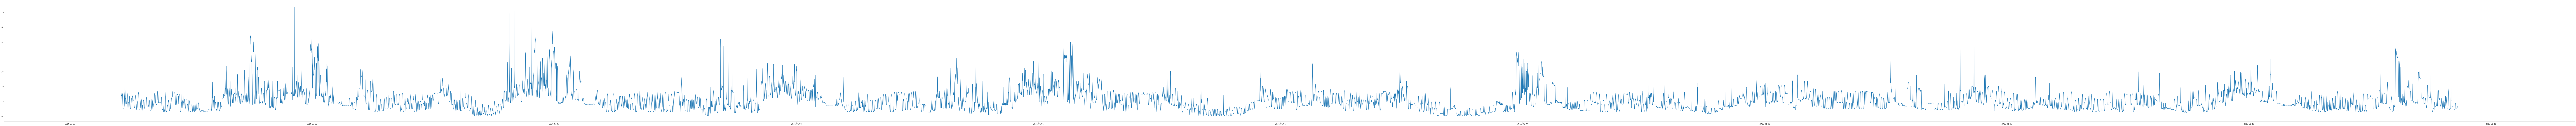

In [17]:
df1 = df[1:13905]
plt.figure(figsize = (250,12))
plt.plot(df1["time"], df1["use"])
plt.show()

This has a low random up and down variation but has high up and down variation during the start of the day



---



Plot of Energy Generation Over 10 Days

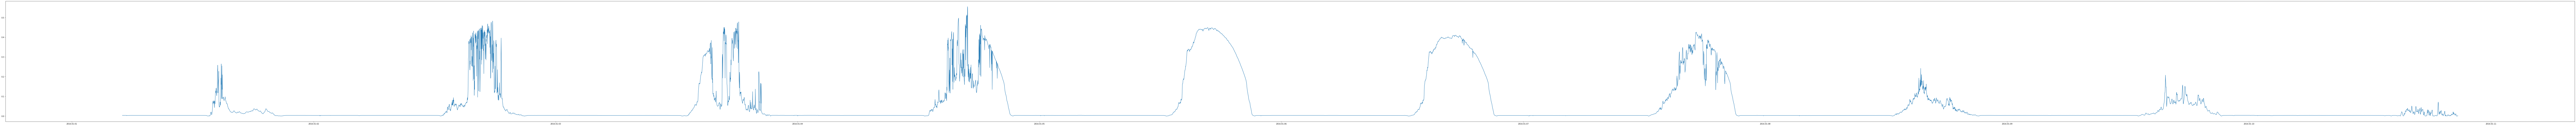

In [18]:
df1 = df[1:13905]
plt.figure(figsize = (250,12))
plt.plot(df1["time"], df1["gen"])
plt.show()

This has constant energy generation but has high generation on every 2nd half of a day

---



Extracting the year, month, day, day name, week, hour and minute from the time attribute using sys functions

In [19]:
df['year'] = df['time'].apply(lambda x : x.year)
df['month'] = df['time'].apply(lambda x : x.month)
df['day'] = df['time'].apply(lambda x : x.day)
df['weekday'] = df['time'].apply(lambda x : x.day_name())
df['weekofyear'] = df['time'].apply(lambda x : x.weekofyear)
df['hour'] = df['time'].apply(lambda x : x.hour)
df['minute'] = df['time'].apply(lambda x : x.minute)
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

time       use       gen  Dishwasher  Furnace 1  Furnace 2  \
0 2016-01-01 05:00:00  0.932833  0.003483    0.000033   0.020700   0.061917   
1 2016-01-01 05:01:00  0.934333  0.003467    0.000000   0.020717   0.063817   
2 2016-01-01 05:02:00  0.931817  0.003467    0.000017   0.020700   0.062317   

   Home office    Fridge  Wine cellar  Garage door  ...  precipIntensity  \
0     0.442633  0.124150     0.006983     0.013083  ...              0.0   
1     0.444067  0.124000     0.006983     0.013117  ...              0.0   
2     0.446067  0.123533     0.006983     0.013083  ...              0.0   

   dewPoint  precipProbability  year  month  day  weekday  weekofyear hour  \
0      24.4                0.0  2016      1    1   Friday          53    5   
1      24.4                0.0  2016      1    1   Friday          53    5   
2      24.4                0.0  2016      1    1   Friday          53    5   

   minute  
0       0  
1       1  
2       2  

[3 rows x 36 columns]

Extracting different time of the day using the hours attribute using sys functions

In [20]:
def hours2timing(x):
    if x in [22,23,0,1,2,3]:
        timing = 'Night'
    elif x in range(4, 12):
        timing = 'Morning'
    elif x in range(12, 17):
        timing = 'Afternoon'
    elif x in range(17, 22):
        timing = 'Evening'
    else:
        timing = 'X'
    return timing
df['timing'] = df['hour'].apply(hours2timing)
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


time       use       gen  Dishwasher  Furnace 1  Furnace 2  \
0 2016-01-01 05:00:00  0.932833  0.003483    0.000033   0.020700   0.061917   
1 2016-01-01 05:01:00  0.934333  0.003467    0.000000   0.020717   0.063817   
2 2016-01-01 05:02:00  0.931817  0.003467    0.000017   0.020700   0.062317   

   Home office    Fridge  Wine cellar  Garage door  ...  dewPoint  \
0     0.442633  0.124150     0.006983     0.013083  ...      24.4   
1     0.444067  0.124000     0.006983     0.013117  ...      24.4   
2     0.446067  0.123533     0.006983     0.013083  ...      24.4   

   precipProbability  year  month  day  weekday  weekofyear  hour minute  \
0                0.0  2016      1    1   Friday          53     5      0   
1                0.0  2016      1    1   Friday          53     5      1   
2                0.0  2016      1    1   Friday          53     5      2   

    timing  
0  Morning  
1  Morning  
2  Morning  

[3 rows x 37 columns]

Here we are creating functions to group the given attribute by month ,week name and timing of the day.

In [21]:
def groupByMonth(col):
    return df[[col,'month']].groupby('month').agg({col:['mean']})[col]


def groupByWeekday(col):
    weekdayDf = df.groupby('weekday').agg({col:['mean']})
    weekdayDf.columns = [f"{i[0]}_{i[1]}" for i in weekdayDf.columns]
    weekdayDf['week_num'] = [['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'].index(i) for i in weekdayDf.index]
    weekdayDf.sort_values('week_num', inplace=True)
    weekdayDf.drop('week_num', axis=1, inplace=True)
    return weekdayDf

    
def groupByTiming(col):
    timingDf = df.groupby('timing').agg({col:['mean']})
    timingDf.columns = [f"{i[0]}_{i[1]}" for i in timingDf.columns]
    timingDf['timing_num'] = [['Morning','Afternoon','Evening','Night'].index(i) for i in timingDf.index]
    timingDf.sort_values('timing_num', inplace=True)
    timingDf.drop('timing_num', axis=1, inplace=True)
    return timingDf

Grouping Energy Generation and Energy Usage by month

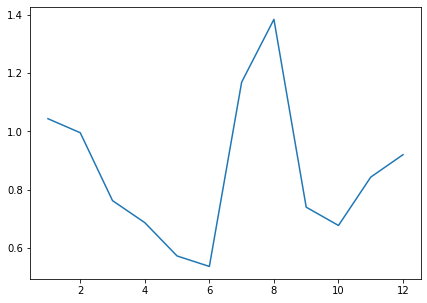

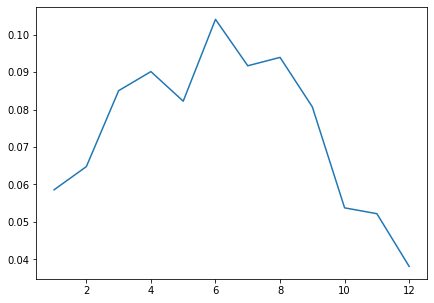

In [22]:
plt.figure(figsize = (7,5))
plt.plot(groupByMonth("use"))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByMonth("gen"))
plt.show()

The Energy Usage is low during the May & July <br>
Has a spontaneous raise during July and spontaneous fall during September. <br>Energy usage is highest at August<br>
<br>
Energy Generation is lowest at Winter Season

---



Grouping Energy Generation and Energy Usage by weekday

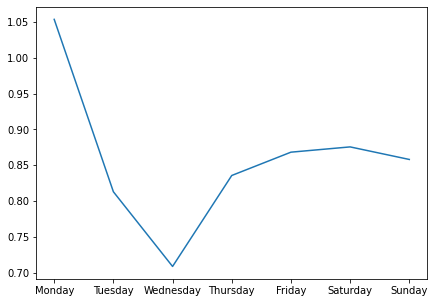

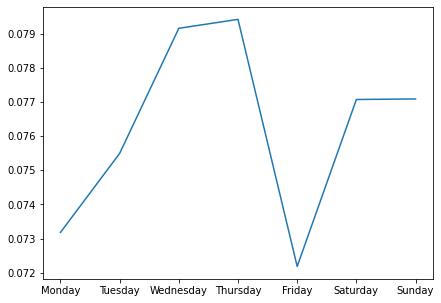

In [23]:
plt.figure(figsize = (7,5))
plt.plot(groupByWeekday("use"))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday("gen"))
plt.show()

Energy usage is lowest on Wednesday <br>
Energy generation is lowest on Friday

---



Grouping Energy Generation and Energy Usage by Timing

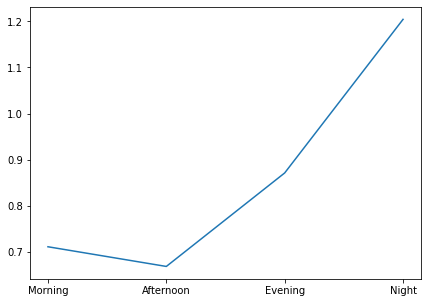

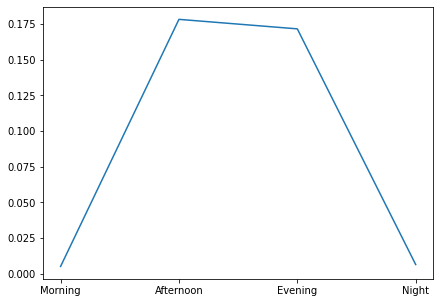

In [24]:
plt.figure(figsize = (7,5))
plt.plot(groupByTiming("use"))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming("gen"))
plt.show()

Energy usage raises after Afternoon<br>
Energy generation gradually raises during Morning and gradually falls during 
Night

---



Correaltion Plot

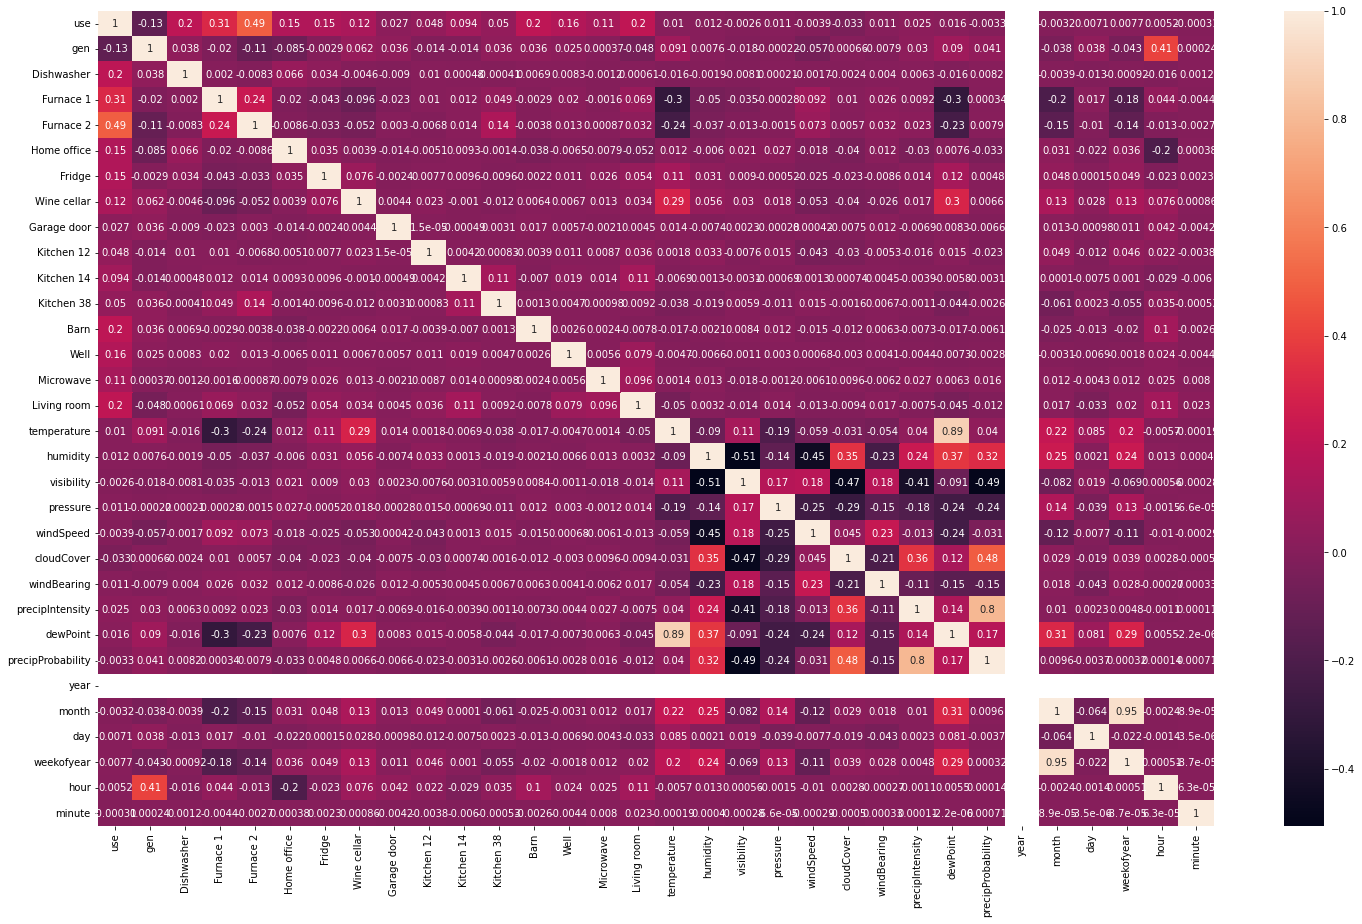

In [25]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr('pearson'), annot = True)

Total Energy Usage highly depends on appliances like Dishwasher, Furnace, Home Office, Fridge, Wine Cellar, Barn, Well, Microwave and Living Room.<br>
<br>
Usage of Furnace, Fridge and Wine Cellar increases the Temperature

---



Ploting Dishwasher based on Month, Weekday and Timing

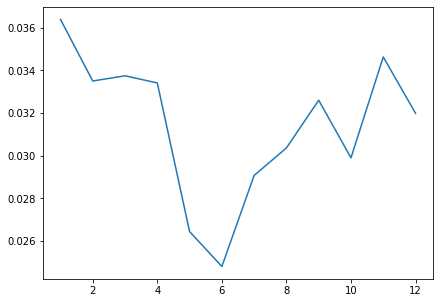

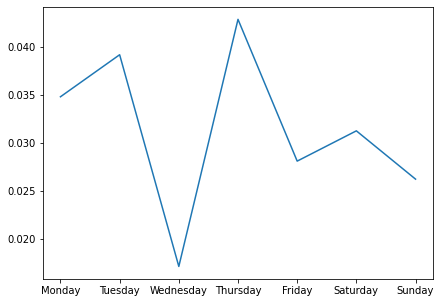

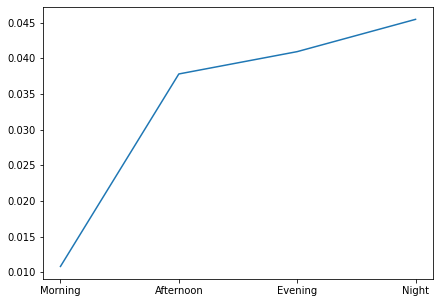

In [26]:
plt.figure(figsize = (7,5))
plt.plot(groupByMonth('Dishwasher'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('Dishwasher'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('Dishwasher'))
plt.show()

Ploting Home office based on Month, Weekday and Timing

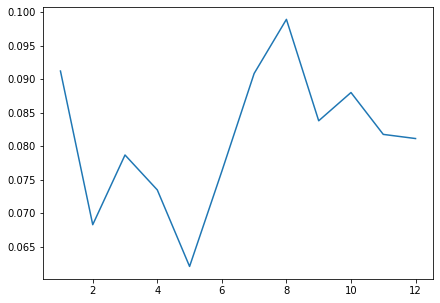

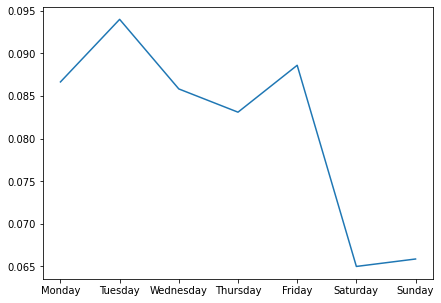

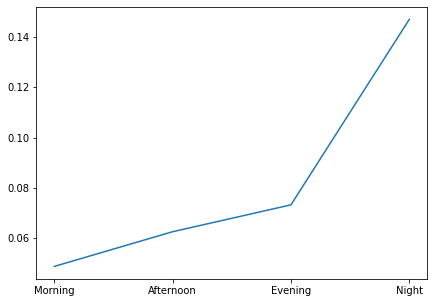

In [27]:
plt.figure(figsize = (7,5))
plt.plot(groupByMonth('Home office'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('Home office'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('Home office'))
plt.show()

Ploting Fridge based on Month, Weekday and Timing

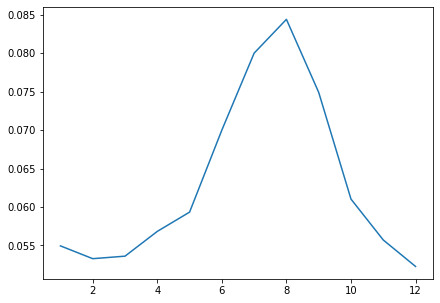

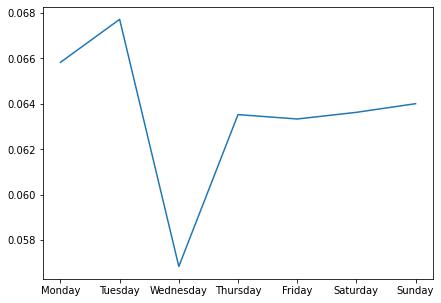

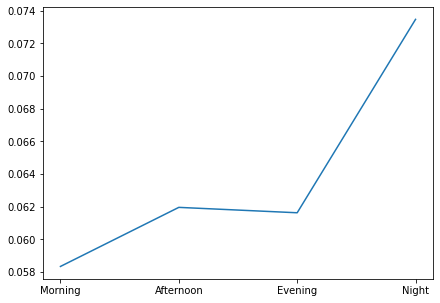

In [28]:
plt.figure(figsize = (7,5))
plt.plot(groupByMonth('Fridge'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('Fridge'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('Fridge'))
plt.show()

Ploting Wine Cellar based on Month, Weekday and Timing

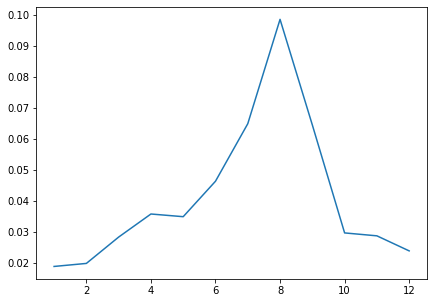

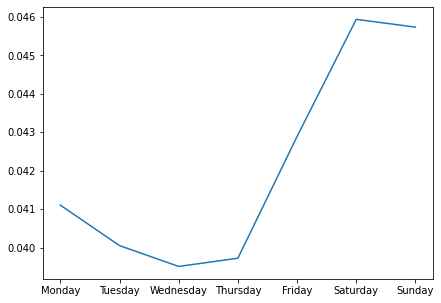

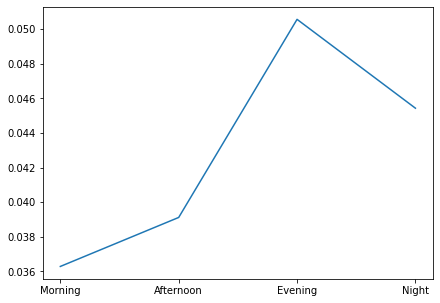

In [29]:
plt.figure(figsize = (7,5))
plt.plot(groupByMonth('Wine cellar'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('Wine cellar'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('Wine cellar'))
plt.show()

Ploting Garage door based on Month, Weekday and Timing

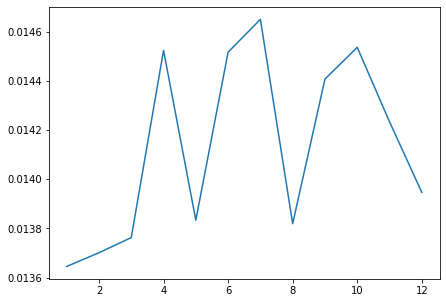

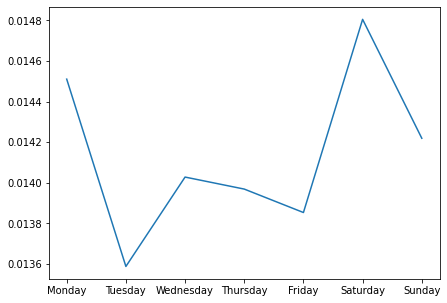

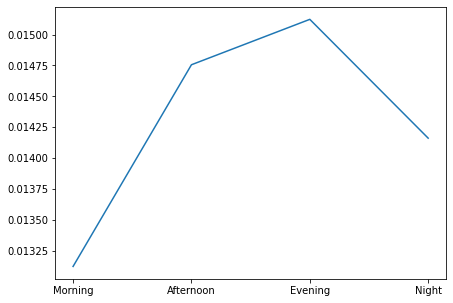

In [30]:
plt.figure(figsize = (7,5))
plt.plot(groupByMonth('Garage door'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('Garage door'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('Garage door'))
plt.show()

Ploting Barn based on Month, Weekday and Timing

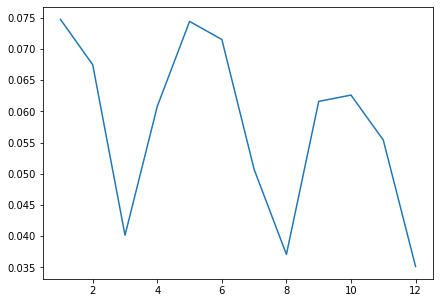

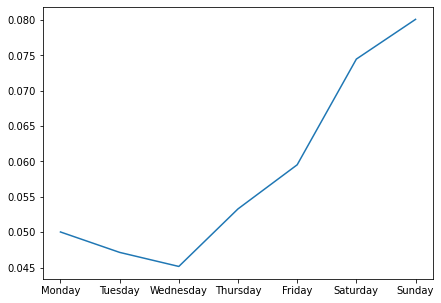

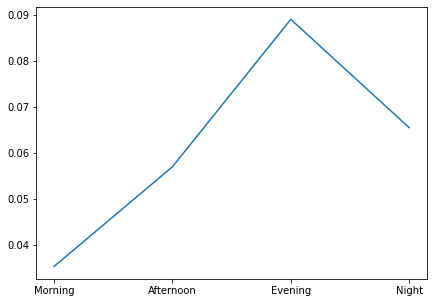

In [31]:
plt.figure(figsize = (7,5))
plt.plot(groupByMonth('Barn'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('Barn'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('Barn'))
plt.show()

Ploting Well based on Month, Weekday and Timing

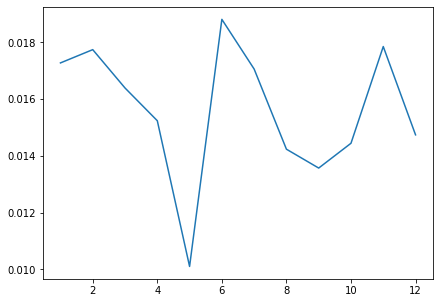

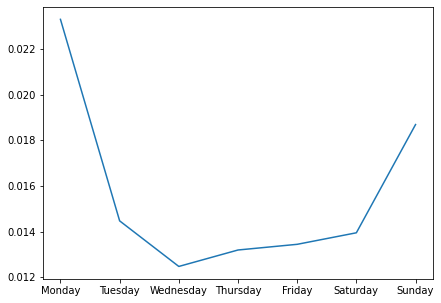

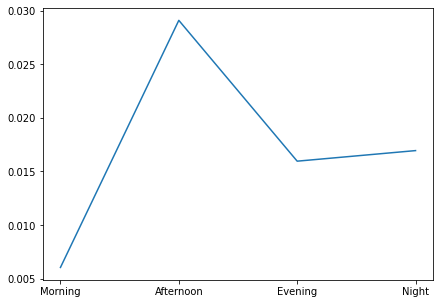

In [32]:
plt.figure(figsize = (7,5))
plt.plot(groupByMonth('Well'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('Well'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('Well'))
plt.show()

All these are plots are similar to Energy Usage

---



Ploting Temperature based on Month, Weekday and Timing

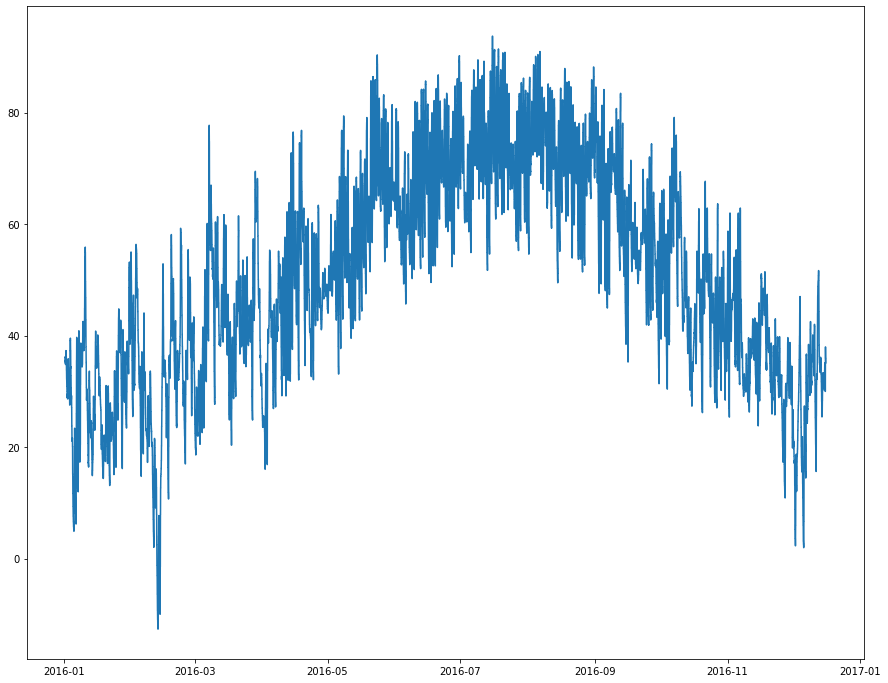

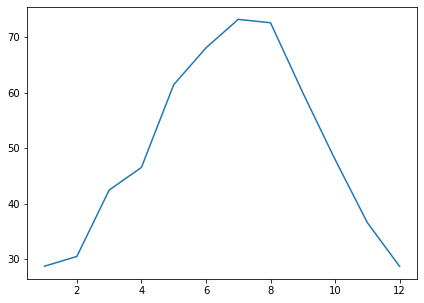

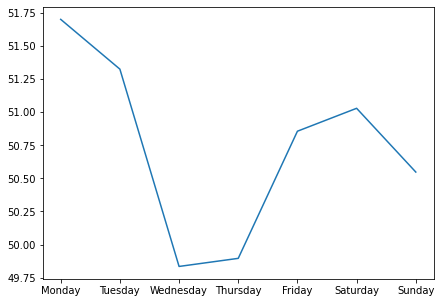

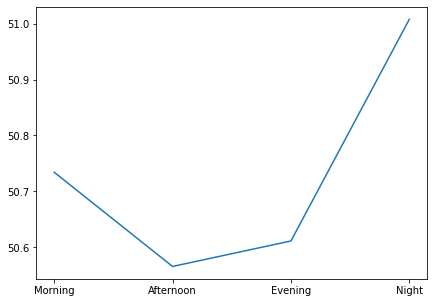

In [33]:
plt.figure(figsize = (15,12))
plt.plot(df["time"], df["temperature"])
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByMonth('temperature'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('temperature'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('temperature'))
plt.show()

Ploting Humidity based on Month, Weekday and Timing

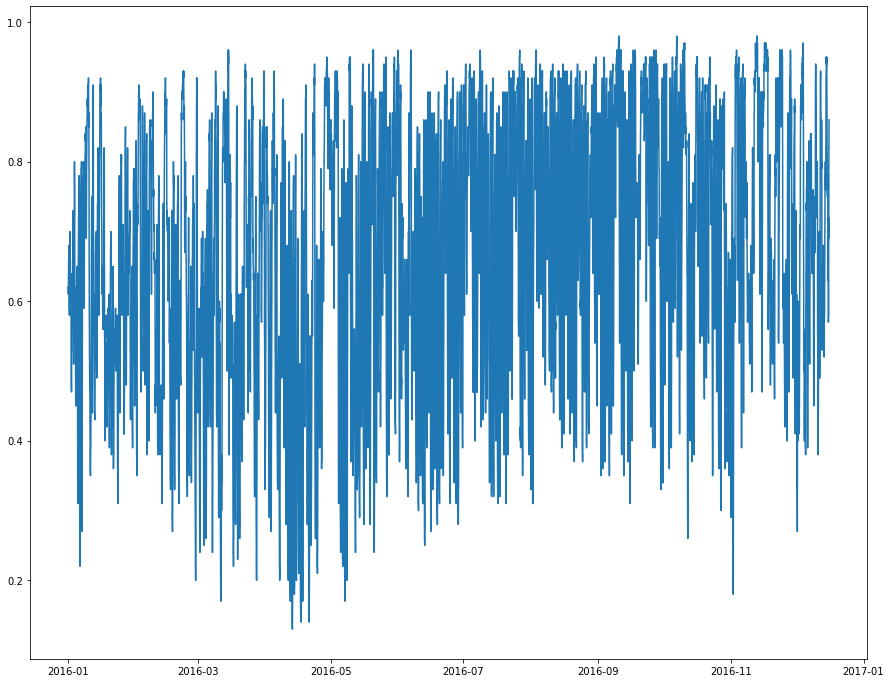

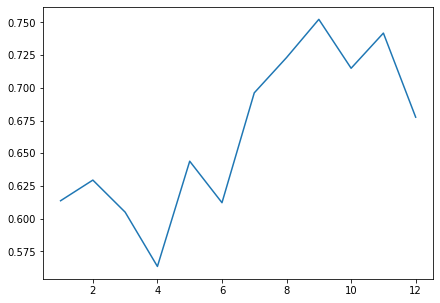

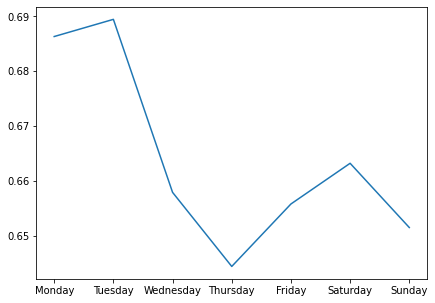

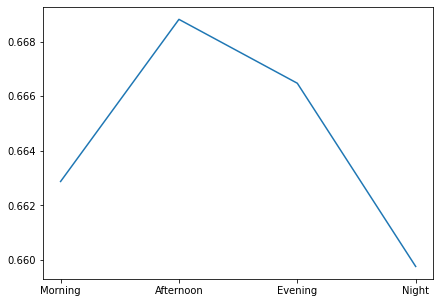

In [34]:
plt.figure(figsize = (15,12))
plt.plot(df["time"], df["humidity"])
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByMonth('humidity'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('humidity'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('humidity'))
plt.show()

Ploting Visibility based on Month, Weekday and Timing

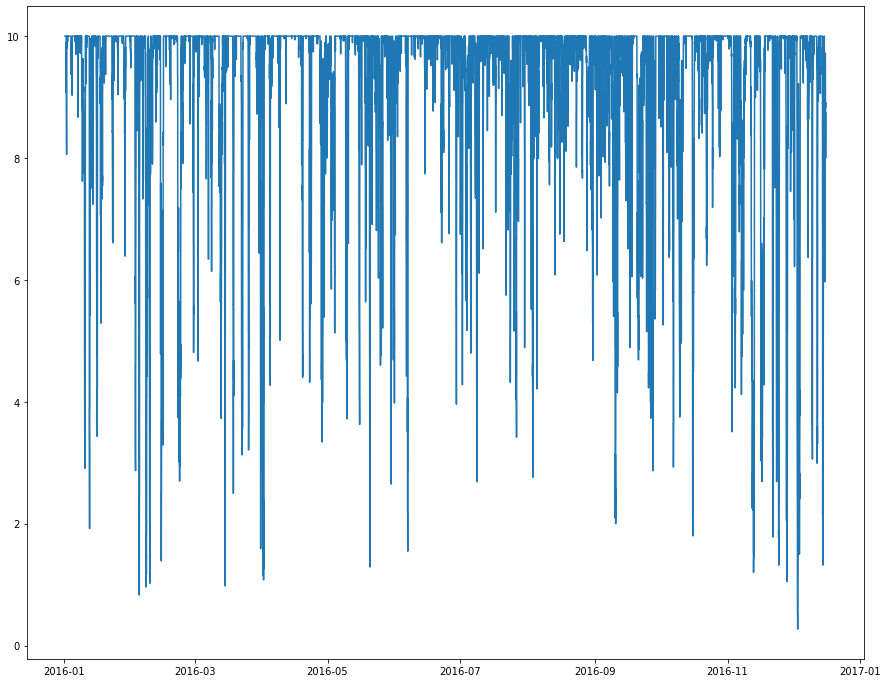

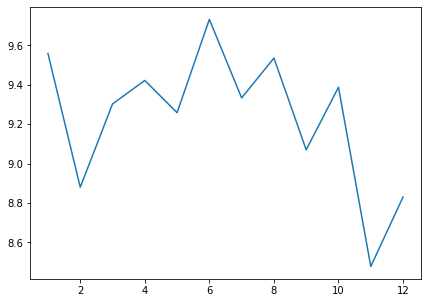

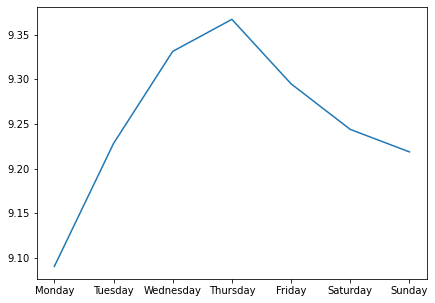

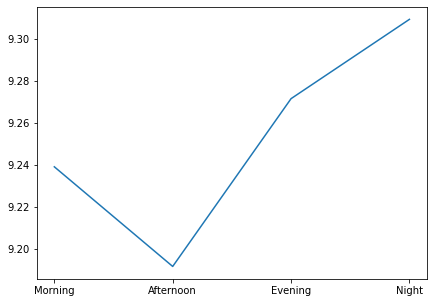

In [35]:
plt.figure(figsize = (15,12))
plt.plot(df["time"], df["visibility"])
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByMonth('visibility'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('visibility'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('visibility'))
plt.show()

Ploting Pressure based on Month, Weekday and Timing

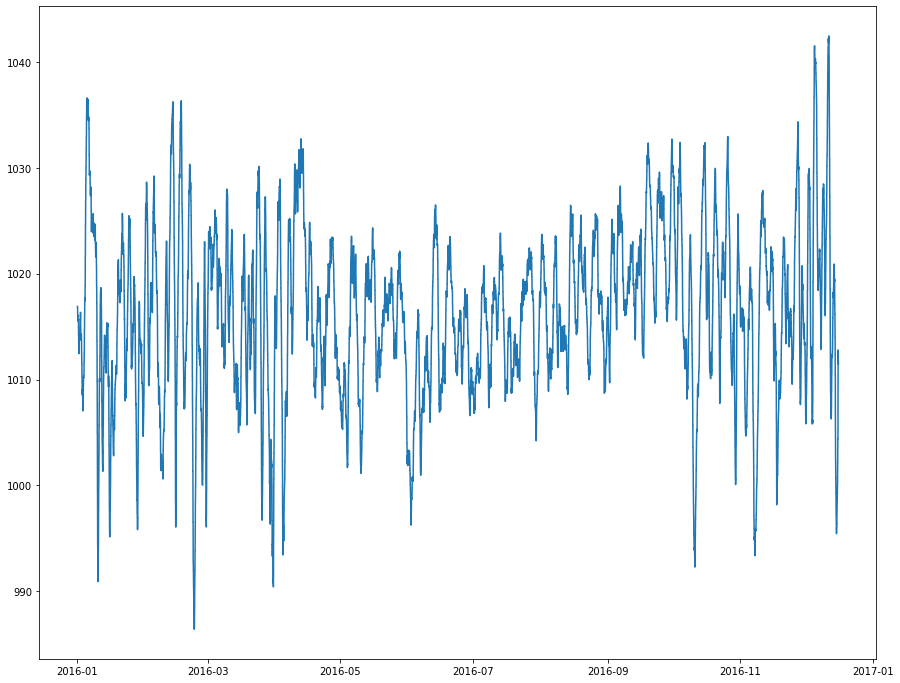

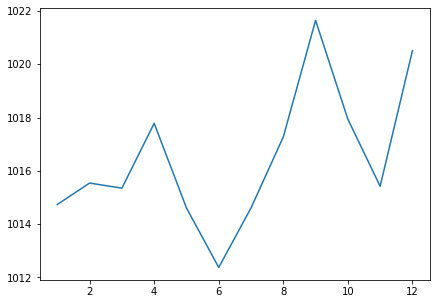

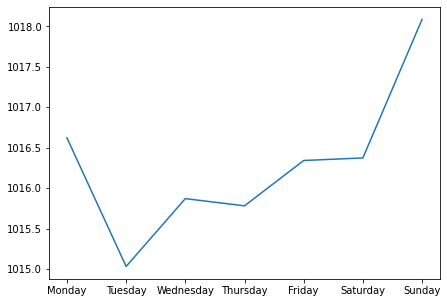

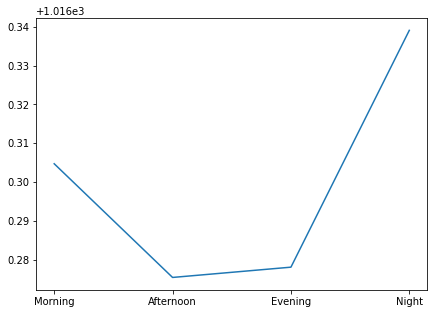

In [36]:
plt.figure(figsize = (15,12))
plt.plot(df["time"], df["pressure"])
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByMonth('pressure'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('pressure'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('pressure'))
plt.show()

Ploting Wind Speed based on Month, Weekday and Timing

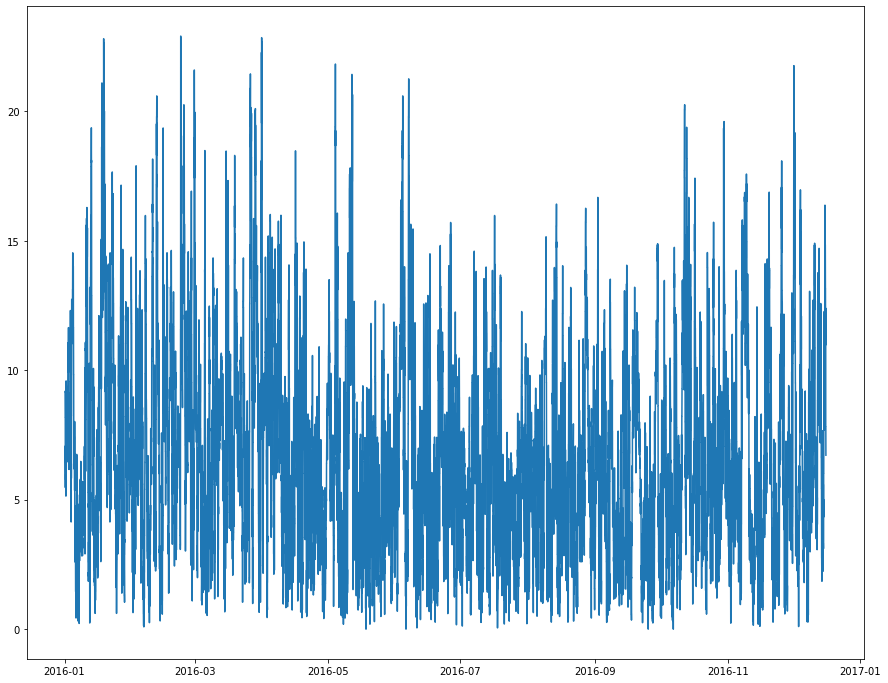

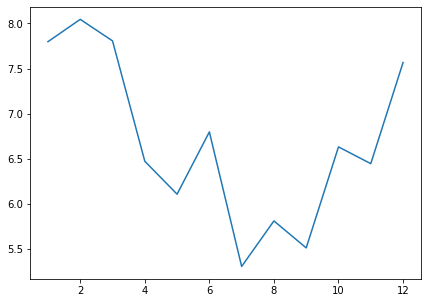

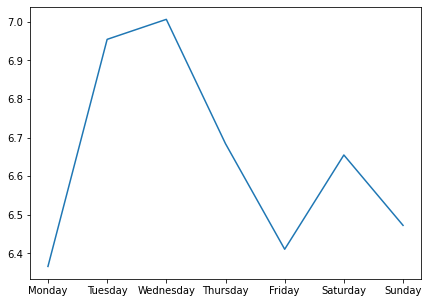

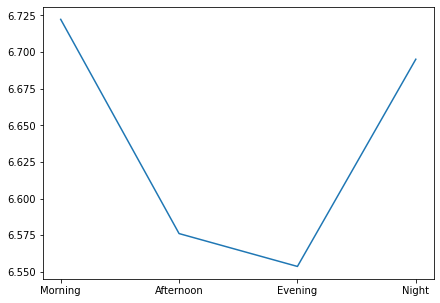

In [37]:
plt.figure(figsize = (15,12))
plt.plot(df["time"], df["windSpeed"])
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByMonth('windSpeed'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('windSpeed'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('windSpeed'))
plt.show()

Ploting Raining Intensity based on Month, Weekday and Timing

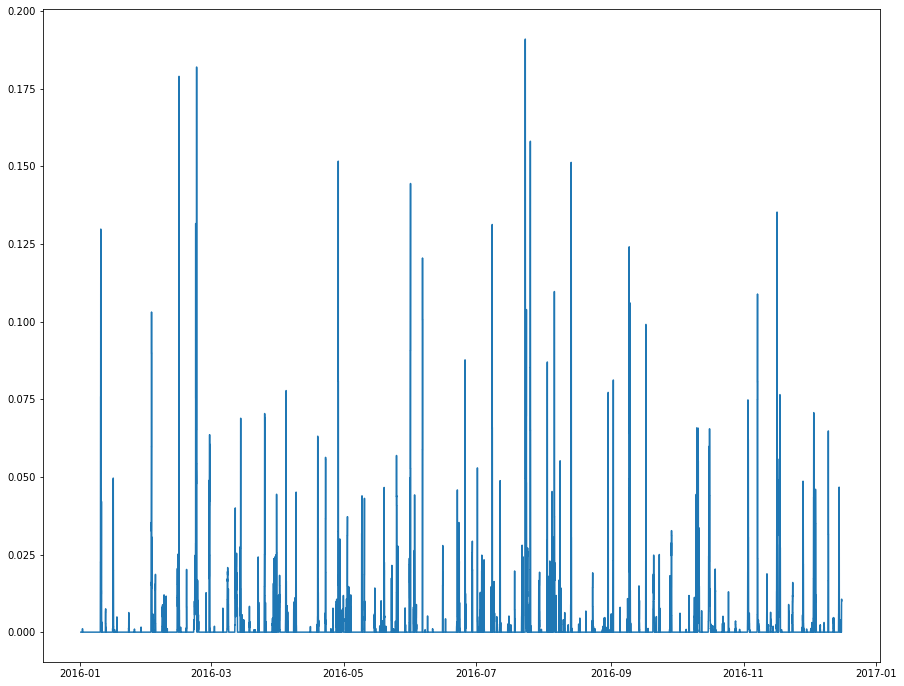

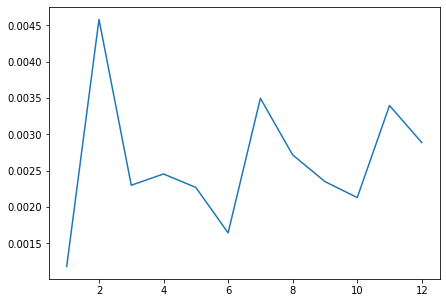

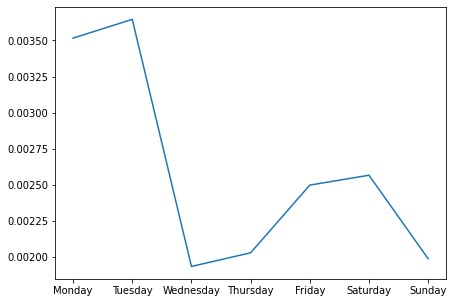

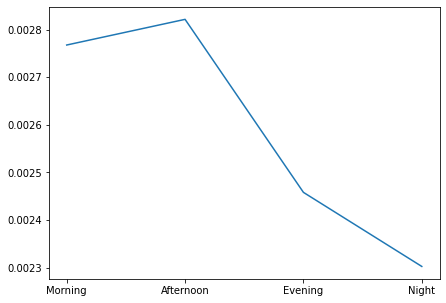

In [38]:
plt.figure(figsize = (15,12))
plt.plot(df["time"], df["precipIntensity"])
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByMonth('precipIntensity'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByWeekday('precipIntensity'))
plt.show()

plt.figure(figsize = (7,5))
plt.plot(groupByTiming('precipIntensity'))
plt.show()

All the Weather Attributes follows the natural pattern like visibility is low in winter & nights, visibility is low when humidity is high etc<br>
The only exception is the temperature which doesn't seem to obey the natural pattern

---



# Time Series

Separating Energy usage from the main dataframe with the time for time series analysis

In [39]:
df1 = df.iloc[:,[0,1]]
df1.index = df1.time
df1 = df1["use"]
df1

time
2016-01-01 05:00:00    0.932833
2016-01-01 05:01:00    0.934333
2016-01-01 05:02:00    0.931817
2016-01-01 05:03:00    1.022050
2016-01-01 05:04:00    1.139400
                         ...   
2016-12-16 03:25:00    1.601233
2016-12-16 03:26:00    1.599333
2016-12-16 03:27:00    1.924267
2016-12-16 03:28:00    1.978200
2016-12-16 03:29:00    1.990950
Name: use, Length: 503910, dtype: float64

Seasonal Decompose model and its plot

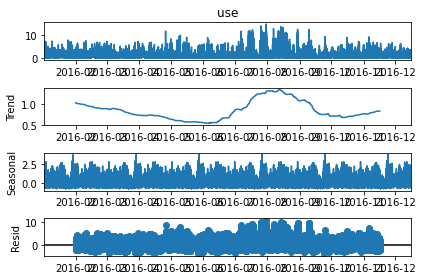

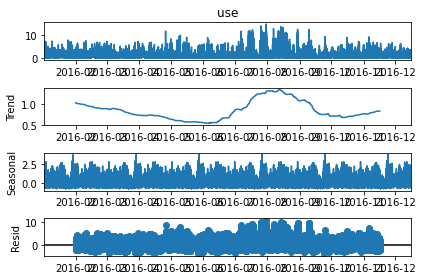

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df1, period =60*60*24)
result.plot()

Importing Time Series library

In [42]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

Forecasting using Simple Exponential Smoothing 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


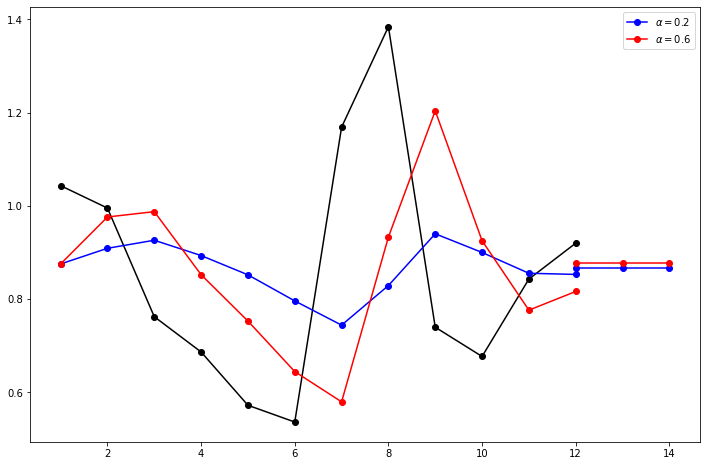

In [43]:
fit1 = SimpleExpSmoothing(groupByMonth('use'),initialization_method='heuristic').fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.2$")

fit2 = SimpleExpSmoothing(groupByMonth('use'),initialization_method='heuristic').fit(smoothing_level=0.6, optimized=False)
fcast2 = fit2.forecast(3).rename(r"$\alpha=0.6$")

plt.figure(figsize=(12, 8))
plt.plot(groupByMonth('use'), marker="o", color="black")
plt.plot(fit1.fittedvalues, marker="o", color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, marker="o", color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.legend([line1, line2], [fcast1.name, fcast2.name])

Forecasting using Holts ,Exponential Smoothing and Additive damped model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

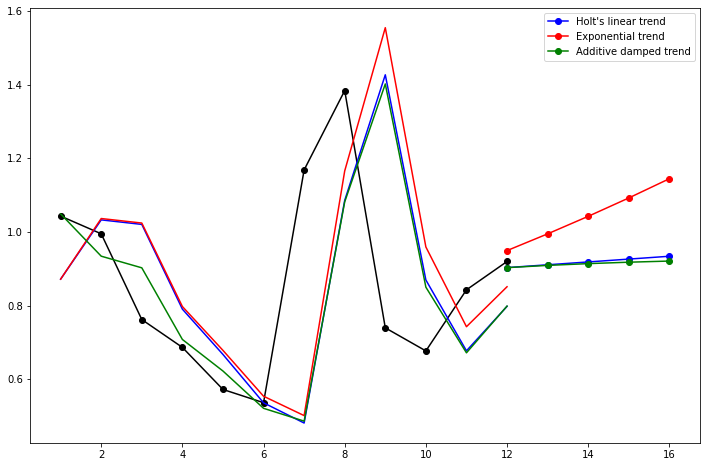

In [44]:
fit1 = Holt(groupByMonth('use'),initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")

fit2 = Holt(groupByMonth('use'), exponential=True,initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")

fit3 = Holt(groupByMonth('use'), damped_trend=True,initialization_method='estimated').fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(groupByMonth('use'), marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

In [70]:
from sklearn.metrics import mean_squared_error


Mean Square Error

In [66]:
mean_squared_error(groupByMonth('use').to_numpy().flatten(),fit1.fittedvalues.to_numpy())

0.1025494703989414

In [67]:
mean_squared_error(groupByMonth('use').to_numpy().flatten(),fit2.fittedvalues.to_numpy())

0.11462802324034244

In [69]:
mean_squared_error(groupByMonth('use').to_numpy().flatten(),fit3.fittedvalues.to_numpy())

0.09134904624034075

The above shows that Additive damped method has the least mean square error